In [29]:
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
SEED = 1024
np.random.seed(SEED)

In [3]:
users = pd.read_csv("./users.csv")
users = users[users.columns[1:]]
users.head()

,0,1,2,3,4,5,6,7,8,9
0,0.400,0.325,0.325,0.5125,0.375,0.3000,0.5500,0.4125,0.4275,0.5500
1,0.045,0.215,0.100,0.0750,0.250,0.1675,0.1400,0.1750,0.1000,0.1725
2,0.200,0.025,0.050,0.0250,0.200,0.2050,0.1145,0.2500,0.0575,0.0950
3,0.745,0.250,0.600,0.6125,0.375,0.4450,0.6750,0.5800,0.5850,0.6800
4,0.370,0.590,0.375,0.6875,0.600,0.5300,0.5500,0.6075,0.6750,0.6475


In [4]:
cluster = DBSCAN(eps=.5,metric="manhattan",algorithm="kd_tree")

In [5]:
Y = cluster.fit(users)
len(set(Y.labels_))

40

In [6]:
index_denoised = np.vectorize(lambda x: x > -1)(Y.labels_)

In [7]:
users = users[index_denoised]
Y = Y.labels_[index_denoised]


#### Show cluster

In [7]:
from sklearn.manifold import TSNE
rd = TSNE(random_state=SEED)

In [8]:
u = rd.fit_transform(users)

/home/atp-ariel/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/atp-ariel/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


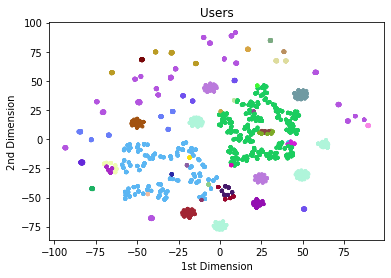

In [9]:
sample = []
sample[:0] = 'ABCDEF0123456789'
class_color = ["#"+"".join([np.random.choice(sample) for i in range(6)]) for _ in range(len(set(Y)))]
colors = [class_color[i] for i in Y]

plt.scatter(u[:,0], u[:,1], marker='.', color=colors)
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title("Users")
plt.show()

#### Classify users

In [21]:
gnb = SVC(random_state=SEED, probability=True)

In [12]:
X_tr, X_t, Y_tr, Y_t = train_test_split(users, Y, train_size=0.8, random_state=SEED)
X_tr, X_t = X_tr.to_numpy(), X_t.to_numpy()

In [13]:
kf = StratifiedKFold(n_splits=len(set(Y)),random_state=SEED, shuffle=True)

In [22]:
nb = []
for t, v in kf.split(X_tr, Y_tr):
    gnb.fit(X_tr[t], Y_tr[t])
    
    nb.append(accuracy_score(gnb.predict(X_tr[v]),Y_tr[v]))

print(np.mean(nb))

/home/atp-ariel/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=39.
  warnings.warn(


0.9857468503956229


In [28]:
accuracy_score(gnb.predict(X_t), Y_t)

0.986

In [30]:
pickle.dump(gnb, open("./classify_user.bin", "wb"))